In [1]:
import pandas as pd
import numpy as np
import sqlite3
import re

In [2]:
conexion = sqlite3.connect("Datos")
cursor = conexion.cursor()

In [68]:
users = pd.DataFrame(cursor.execute("select * from usuarios").fetchall(), columns = [0,"id_user","name_user","username_user"]).set_index(0)

In [69]:
users.drop_duplicates(subset = "id_user", inplace = True)

In [70]:
tweets = pd.DataFrame(cursor.execute("select * from tweets").fetchall(), columns = [0,"id_tweet","mensaje_tweet", "fecha_tweet", "author_tweet", "retweet_count", "reply_count", 
"like_count", "quote_count"]).set_index(0)

In [71]:
data = pd.merge(users, tweets, left_on = "id_user", right_on = "author_tweet")

In [72]:
data["fecha_tweet"] = pd.to_datetime(pd.to_datetime(data["fecha_tweet"], infer_datetime_format=True).dt.strftime("%y/%m/%d"))

In [8]:
REPLACE_NO_SPACE = re.compile(r"(\.)|(\;)|(\:)|(\!)|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")
REPLACE_WITH_SPACE = re.compile(r"(<br\s*/><br\s*/>)|(\-)|(\/)|(\n)")
NO_SPACE = ""
SPACE = " "

In [9]:
mensaje1 = [REPLACE_NO_SPACE.sub(NO_SPACE, line.lower()) for line in data["mensaje_tweet"]]
mensaje2 = [REPLACE_WITH_SPACE.sub(SPACE, line) for line in mensaje1]

In [10]:
data["mensaje_tweet"] = mensaje2

In [11]:
data.head()

,id_user,name_user,username_user,id_tweet,mensaje_tweet,fecha_tweet,author_tweet,retweet_count,reply_count,like_count,quote_count
0,1003872445,Pau Mugarra,PauMugarra,1577334577701453827,recordaros que la semana que viene tenemos la ...,2004-10-22,1003872445,2,0,12,0
1,1003872445,Pau Mugarra,PauMugarra,1573246948693651456,y seguimos con lo prometido primera quedada d...,2023-09-22,1003872445,7,0,20,4
2,1003872445,Pau Mugarra,PauMugarra,1541674892390719490,@heavymental_es @davidalayon @recuenco @_miki ...,2028-06-22,1003872445,0,3,2,0
3,2529499620,Formación Fundación Universidad Carlos III,formacion_fuc3,1576902991507922944,el desarrollador web es uno de los perfiles má...,2003-10-22,2529499620,3,0,3,0
4,706520411551494145,JoseSola,Jose_Sola_,1576856703349374976,@jorgegrev @thebridge_tech enhorabuena crack,2003-10-22,706520411551494145,0,0,1,0


--------

## A. ¿Cuál es el tweet con mayor repercusión?

In [12]:
data[data["retweet_count"] == data["retweet_count"].max()]

,id_user,name_user,username_user,id_tweet,mensaje_tweet,fecha_tweet,author_tweet,retweet_count,reply_count,like_count,quote_count
37,106344840,Cámara de Comercio de Sevilla,camaradesevilla,1564951151124029441,¿quieres impulsar tu perfil profesional en el ...,2031-08-22,106344840,11,0,13,0


## B. ¿Cuál es el usuario que más menciona a la escuela?

In [13]:
data[data["username_user"] == data["username_user"].value_counts().index[0]]

,id_user,name_user,username_user,id_tweet,mensaje_tweet,fecha_tweet,author_tweet,retweet_count,reply_count,like_count,quote_count
78,1255794072280842240,Heavy Mental,HeavyMental_es,1542224482710028291,@carlosmdh @ubaldohervas @davidalayon @recuenc...,2029-06-22,1255794072280842240,0,1,3,0
79,1255794072280842240,Heavy Mental,HeavyMental_es,1542206287915585536,el sentido de la vida ya no es light menta...,2029-06-22,1255794072280842240,3,2,22,3
80,1255794072280842240,Heavy Mental,HeavyMental_es,1541690507600056320,@mulder @paumugarra @davidalayon @recuenco @_m...,2028-06-22,1255794072280842240,0,1,1,0
81,1255794072280842240,Heavy Mental,HeavyMental_es,1541558488001822725,@bombabarros @mulder @_miki @recuenco @davidal...,2027-06-22,1255794072280842240,0,0,3,0
82,1255794072280842240,Heavy Mental,HeavyMental_es,1541445192925978625,@vmcasamayor @thebridge_tech @recuenco @alient...,2027-06-22,1255794072280842240,0,0,1,0
83,1255794072280842240,Heavy Mental,HeavyMental_es,1541403726182858753,@joobid @thebridge_tech @recuenco @guillermode...,2027-06-22,1255794072280842240,0,1,1,0
84,1255794072280842240,Heavy Mental,HeavyMental_es,1541334998892036096,@jatorrero @thebridge_tech juan antonio te man...,2027-06-22,1255794072280842240,0,1,2,0
85,1255794072280842240,Heavy Mental,HeavyMental_es,1541297237485035520,@navarro_batista @thebridge_tech en orbyt ya s...,2027-06-22,1255794072280842240,0,1,1,0
86,1255794072280842240,Heavy Mental,HeavyMental_es,1541062348970115072,@carloslgonzalez @thebridge_tech yes seguramen...,2026-06-22,1255794072280842240,0,0,2,0
87,1255794072280842240,Heavy Mental,HeavyMental_es,1541060983476584448,@carloslgonzalez @thebridge_tech sí vida real ...,2026-06-22,1255794072280842240,0,1,1,0


## C. ¿En qué mes se concentra el mayor número de tweets?

In [14]:
data["fecha_tweet"].dt.month.value_counts().index[0]

6

## D . ¿Qué palabras son más frecuentes?

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
vectorizer = CountVectorizer()

In [17]:
mensaje_tweet = vectorizer.fit_transform(data["mensaje_tweet"])

In [18]:
vectorizer.get_feature_names_out()

array(['_miki', '_sergiosanjuan', 'abierto', ..., '𝗗𝗲𝘀𝗮𝗳𝗶𝗼', '𝗱𝗲',
       '𝘁𝗿𝗶𝗽𝘂𝗹𝗮𝗰𝗶𝗼𝗻𝗲𝘀'], dtype=object)

In [19]:
pd.DataFrame(vectorizer.vocabulary_, index = [0]).iloc[0].sort_values(ascending = False).index[0]

'𝘁𝗿𝗶𝗽𝘂𝗹𝗮𝗰𝗶𝗼𝗻𝗲𝘀'

## E. ¿Qué tipo de correlación matemática encuentras en las métricas públicas?

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
data.columns

Index(['id_user', 'name_user', 'username_user', 'id_tweet', 'mensaje_tweet',
       'fecha_tweet', 'author_tweet', 'retweet_count', 'reply_count',
       'like_count', 'quote_count'],
      dtype='object')

<AxesSubplot:>

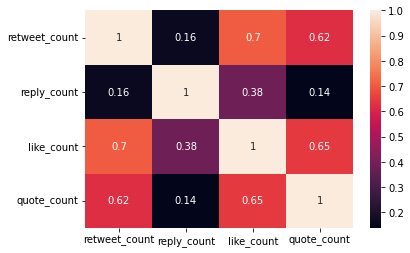

In [22]:
sns.heatmap(data[["retweet_count", "reply_count", "like_count", "quote_count"]].corr(), annot = True)

c:\Users\tonim\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\tonim\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\Users\tonim\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword 

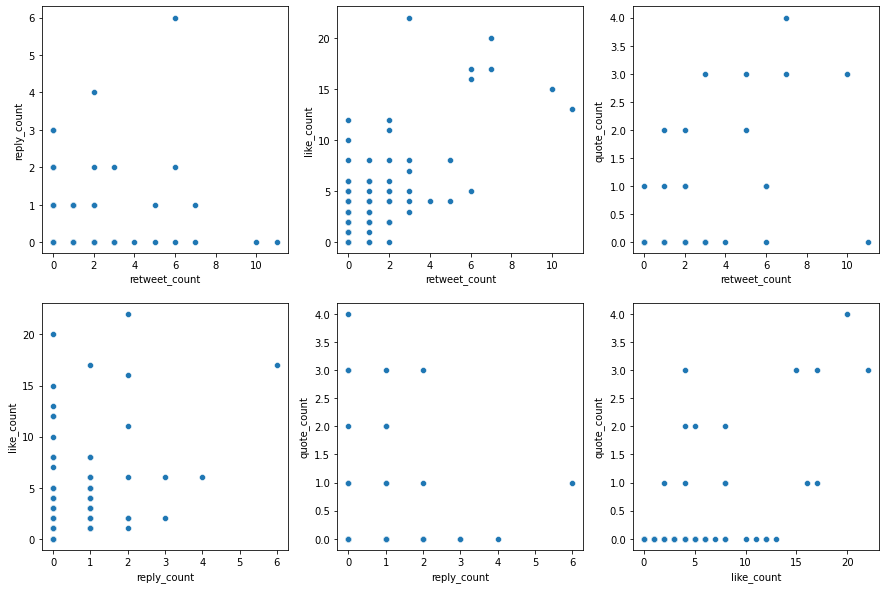

In [23]:
plt.figure(figsize = (15,10));
plt.subplot(2,3,1);
sns.scatterplot(data["retweet_count"], data["reply_count"]);
plt.subplot(2,3,2);
sns.scatterplot(data["retweet_count"], data["like_count"]);
plt.subplot(2,3,3);
sns.scatterplot(data["retweet_count"], data["quote_count"]);
plt.subplot(2,3,4);
sns.scatterplot(data["reply_count"], data["like_count"]);
plt.subplot(2,3,5);
sns.scatterplot(data["reply_count"], data["quote_count"]);
plt.subplot(2,3,6);
sns.scatterplot(data["like_count"], data["quote_count"]);


## F. ¿Has sacado alguna conclusión extra en tu análisis?

# MODELO

In [238]:
import pickle

In [240]:
with open("sentiment_model", "rb") as f:
    modelo = pickle.load(f)

### Ejemplos predicciones

In [336]:
data["mensaje_tweet"][0]

'Recordaros que la semana que viene tenemos la primera quedada #CPS en Madrid, en @TheBridge_Tech, en el que tendremos la gran suerte de contar con @Recuenco para que nos dé una charla. Las plazas se han agotado, pero os podéis apuntar al grupo para próximas quedadas 🚀'

In [246]:
modelo.predict(data["mensaje_tweet"][:5])

array([1, 1, 1, 1, 0], dtype=int64)

In [248]:
data["mensaje_tweet"][4]

'@jorgegrev @TheBridge_Tech Enhorabuena crack!'

## feature importance

In [ ]:
modelo["vect"].vocabulary_

In [290]:
coef = np.abs(modelo["cls"].coef_[0])

In [315]:
coef = np.sort(np.abs(modelo["cls"].coef_[0]))[-7:]

In [299]:
indice_coef = []

In [300]:
for x in np.sort(np.abs(modelo["cls"].coef_[0]))[-7:]:
    indice_coef.append(list(coef).index(x))

In [301]:
indice_coef

[232, 106, 390, 118, 439, 340, 333]

In [308]:
nombres_indice = []

In [309]:
for x in indice_coef:
    nombres_indice.append(list(modelo["vect"].vocabulary_)[x])

In [310]:
nombres_indice

['reduc', 'gobiern', 'eleg', 'blanc', 'tim', 'abc_es', 'cart']

In [321]:
nombres_indice_reversed = []
coef_reversed = []

In [322]:
for x in reversed(nombres_indice):
    nombres_indice_reversed.append(x)
for x in reversed(coef):
    coef_reversed.append(x)

<AxesSubplot:>

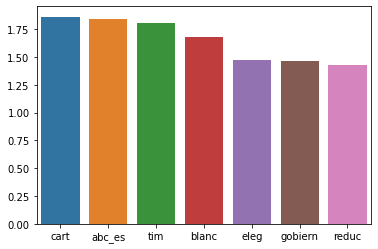

In [328]:
sns.barplot(x = nombres_indice_reversed, y = coef_reversed)

## > El modelo se podría mejorar añadiendo variables que valoren grupos de palabras, eliminando las variables que representan palabras sin importancia, como determinantes, conjunciones, preposiciones, eliminando la distincion entre plurales, singulares y tiempos verbales.

## > El machine learning se podría aplicar por ejemplo a intentar predecir cuanta repercusión tendrá un tweet teniendo en cuenta los likes y retweets o qué tweet le va a gustar a una clase concreta de perfiles o los espacios le puede gustar.